# S8世界总决赛战队分析

***
* **分析目的**：本文对流行的MOBA（多人在线战术竞技）游戏league of legends（英雄联盟）S8世界总决赛游戏数据进行分析，  
&emsp;&ensp;&emsp;&emsp;&emsp;从战队整体数据和选手的整体数据着手，分析并总结S8世界总决赛正赛16个战队的战术风格和特点  
* **分析思路**：首先对战队总体数据进行分析，得到战队的强弱对比，基本特点，再对战队选手进行分析，得到战队的体系构成，战术配置，  
&emsp;&emsp;&emsp;&emsp;&emsp;最后综合地对各战队进行评价  

> 数据来源：玩家电竞网站，截取了S8总决赛正赛战队的总体数据，分‘进攻和经济效率’，‘视野和资源掌控’两部分，  
以及总决赛正赛选手的总体数据，分‘kda数据’，‘farm和团队贡献’两部分
***

# 一. 数据概览

In [1]:
#导入分析和可视化主要库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#预设画布显示
% matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.sans-serif'] =['SimHei']

S8总决赛赛果图：

## 1.1 战队数据

In [3]:
#导入战队数据
s8_data='F:/s8_championship_data.xlsx'
#两部分分别导入
s8_team_atk=pd.read_excel(s8_data,sheet_name='十六强_进攻和经济效率')
s8_team_eye=pd.read_excel(s8_data,sheet_name='十六强_视野和资源掌控')

In [4]:
#先观察进攻端数据
s8_team_atk.head()

,名次,战队,KDA,场均击杀,场均死亡,每分钟伤害,一血率,场均时长,场均经济,每分钟经济,每分钟补刀
0,1,IG,5.6,15.9,9.4,2140,0.611,00:30:05,58066,1929,34.9
1,2,EDG,4.7,13.4,10.2,1798,0.600,00:34:50,61322,1760,33.0
2,3,KT,4.2,10.8,8.9,1562,0.545,00:32:31,57736,1775,34.2
3,4,FW,4.2,12.1,9.4,1706,0.571,00:35:48,61015,1703,33.3
4,5,FNC,4.1,14.0,11.4,1943,0.529,00:30:11,56525,1872,33.1


In [5]:
s8_team_atk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
名次       16 non-null int64
战队       16 non-null object
KDA      16 non-null float64
场均击杀     16 non-null float64
场均死亡     16 non-null float64
每分钟伤害    16 non-null int64
一血率      16 non-null float64
场均时长     16 non-null object
场均经济     16 non-null int64
每分钟经济    16 non-null int64
每分钟补刀    16 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.5+ KB


字段含义解释：  
> 名次：此处名次字段为网站默认名次，非队伍实际名次，应修改为编号  
战队：进入S8正赛（小组赛）的战队队名  
KDA：战损比，游戏中（击杀数（Kill）+助攻数（Assist））/死亡数（Death）得到的值，若死亡数为0以1计算  
场均击杀：平均每场比赛的击杀数  
场均死亡：平均每场比赛的死亡数  
每分钟伤害：平均每分钟对敌方英雄造成的伤害数值  
一血率：拿到第一个击杀（一血）的比赛场次占所有比赛场次的百分比  
场均时长：平均每场比赛的游戏时长  
场均经济：平均每场比赛获得的游戏经济   
每分钟经济：平均每分钟获得的游戏经济  
每分钟补刀：平均每分钟获得的游戏补刀值


In [6]:
#再看视野端数据
s8_team_eye.head()

,名次,战队,场均小龙,小龙控制率,场均大龙,大龙控制率,每分钟插眼,每分钟排眼,排眼效率,场均推塔数,场均被推塔数
0,1,IG,2.2,0.780,0.7,0.632,3.11,1.4,0.407,8.0,3.1
1,2,EDG,1.5,0.429,0.9,0.643,3.38,1.5,0.426,5.5,5.8
2,3,KT,1.4,0.375,0.6,0.538,3.78,1.4,0.413,6.5,5.3
3,4,FW,1.6,0.407,0.7,0.500,3.71,1.5,0.390,5.0,6.3
4,5,FNC,1.5,0.531,0.9,0.762,3.24,1.1,0.356,7.2,3.9


In [7]:
s8_team_eye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
名次        16 non-null int64
战队        16 non-null object
场均小龙      16 non-null float64
小龙控制率     16 non-null float64
场均大龙      16 non-null float64
大龙控制率     16 non-null float64
每分钟插眼     16 non-null float64
每分钟排眼     16 non-null float64
排眼效率      16 non-null float64
场均推塔数     16 non-null float64
场均被推塔数    16 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ KB


字段含义解释：  
> 名次：此处名次字段为网站默认名次，非队伍实际名次，应修改为编号  
战队：进入S8正赛（小组赛）的战队队名  
场均小龙：平均每场比赛的击杀的小龙数量  
小龙控制率：队伍击杀的小龙数量占被击杀的小龙总数的百分比  
场均大龙：平均每场比赛的击杀的大龙数量  
大龙控制率：队伍击杀的小龙数量占被击杀的大龙总数的百分比  
每分钟插眼：平均每分钟所放置的控制守卫（眼）数量  
每分钟排眼：平均每分钟所排除的控制守卫（眼）数量  
排眼效率：平均每分钟排眼总数占敌方平均每分钟插眼总数的百分比  
场均推塔数：平均每场比赛摧毁的敌方防御塔数  
场均被推塔数：平均每场比赛被敌方摧毁的防御塔数

## 1.2 选手数据

In [8]:
#导入总决赛选手数据，分两部分
s8_player_kda=pd.read_excel(s8_data,sheet_name='总决赛选手_kda数据')
s8_player_farm=pd.read_excel(s8_data,sheet_name='总决赛选手_farm和团队贡献')

In [9]:
#先查看kda部分
s8_player_kda.head()

,名次,选手,战队,位置,出场次数,KDA,参团率,场均击杀,单场最高击杀,场均死亡,单场最高死亡,场均助攻
0,1,Rookie,IG,中单,18,6.8,0.686,3.9,9,1.6,4,7.1
1,2,Ning,IG,打野,18,5.2,0.690,2.8,6,2.1,6,8.2
2,3,Baolan,IG,辅助,18,6.5,0.697,1.1,4,1.7,5,10.1
3,4,Jackeylove,IG,ADC,18,5.3,0.669,5.1,13,2.0,5,5.6
4,5,Rekkles,FNC,ADC,17,8.9,0.714,3.6,7,1.1,3,6.4


In [10]:
s8_player_kda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
名次        90 non-null int64
选手        90 non-null object
战队        90 non-null object
位置        90 non-null object
出场次数      90 non-null int64
KDA       90 non-null float64
参团率       90 non-null float64
场均击杀      90 non-null float64
单场最高击杀    90 non-null int64
场均死亡      90 non-null float64
单场最高死亡    90 non-null int64
场均助攻      90 non-null float64
dtypes: float64(5), int64(4), object(3)
memory usage: 8.5+ KB


字段含义解释：  
> 名次：此处名次字段为网站默认名次，非选手实际名次，应修改为编号  
选手：战队的队员游戏昵称，游戏上场的选手是5名，但可以有替补  
战队：进入S8正赛（小组赛）的战队队名  
位置：选手在游戏中担任的团队位置，一般为ADC，中单，上单，打野，辅助五个位置之一  
出场次数：本次总决赛的出场次数（按小场计算）  
KDA：战损比，游戏中（击杀数（Kill）+助攻数（Assist））/死亡数（Death）得到的值，若死亡数为0以1计算  
参团率：选手参与队伍击杀的百分比，游戏中（个人击杀数（Kill）+个人助攻数（Assist））/团队击杀数（Kill）得到的值  
场均击杀：平均每场比赛击杀的敌方英雄数  
单场最高击杀：单场比赛中最高击杀的敌方英雄数  
场均死亡：平均每场比赛死亡数  
单场最高死亡：单场比赛中最高的死亡数  
场均助攻：平均每场比赛的助攻数  

In [11]:
#再看farm端数据
s8_player_farm.head()

,名次,选手,单场最高助攻,GPM,CSPM,每分钟输出,输出占比,每分钟承受伤害,承受伤害占比,每分钟插眼数,每分钟排眼数
0,1,Rookie,14,417,8.89,559,0.261,451,0.174,0.39,0.20
1,2,Ning,12,364,5.36,329,0.154,734,0.283,0.45,0.37
2,3,Baolan,18,258,1.46,150,0.070,371,0.143,1.50,0.28
3,4,Jackeylove,9,466,10.21,580,0.271,368,0.142,0.37,0.41
4,5,Rekkles,15,460,10.38,565,0.291,228,0.088,0.40,0.33


In [12]:
s8_player_farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
名次         90 non-null int64
选手         90 non-null object
单场最高助攻     90 non-null int64
GPM        90 non-null int64
CSPM       90 non-null float64
每分钟输出      90 non-null int64
输出占比       90 non-null float64
每分钟承受伤害    90 non-null int64
承受伤害占比     90 non-null float64
每分钟插眼数     90 non-null float64
每分钟排眼数     90 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 7.8+ KB


字段含义解释：  
> 名次：此处名次字段为网站默认名次，非选手实际名次，应修改为编号  
选手：战队的队员游戏昵称，游戏上场的选手是5名，但可以有替补  
单场最高助攻：单场比赛中最高的助攻数  
GPM：Gold/per minute，平均每分钟取得的游戏金钱数  
CSPM：CS（补刀）/per minute，平均每分钟取得的补刀数  
每分钟输出：平均每分钟对敌方英雄造成的伤害量  
输出占比：选手对敌方英雄造成的伤害占全队对敌方英雄造成的伤害的百分比  
每分钟承受伤害：平均每分钟承受的来自敌方英雄的伤害  
承受伤害占比：选手承受来自敌方英雄的伤害占全队承受敌方英雄伤害的百分比  
每分钟插眼数：平均每分钟所放置的控制守卫（眼）数量  
每分钟排眼数：平均每分钟所排除的控制守卫（眼）数量  

# 二. 数据预处理

## 2.1 战队数据处理

In [13]:
#将战队的两部分数据合并
s8_team_eye.drop('名次',axis=1,inplace=True)
s8_team=s8_team_atk.merge(s8_team_eye,on='战队')
del s8_team_atk,s8_team_eye

#将名次字段改为编号，并用作索引
s8_team.rename(columns={'名次':'编号'},inplace=True)
s8_team.set_index('编号',inplace=True)

In [14]:
#根据赛果，添加成绩的字段,其中1为冠军，2为亚军，4,8,16分别为四强，八强，十六强
rank={'IG':1,'FNC':2,'C9':4,'G2':4,'EDG':8,'RNG':8,'AF':8,'KT':8,'VIT':16,'FW':16,'PVB':16,'GEN':16,'100T':16,'MAD':16,'GRX':16,'TL':16}

s8_team['成绩']=s8_team['战队'].apply(lambda x:rank[x])

In [15]:
#根据战队所属赛区，添加赛区字段，除了大赛区外，外卡队记为other
zone={'IG':'lpl','FNC':'lcs_eu','C9':'lcs_na','G2':'lcs_eu','EDG':'lpl','RNG':'lpl','AF':'lck','KT':'lck','VIT':'lcs_eu','FW':'lms',
      'PVB':'other','GEN':'lck','100T':'lcs_na','MAD':'lms','GRX':'lms','TL':'lcs_na'}

s8_team['赛区']=s8_team['战队'].apply(lambda x:zone[x])

In [16]:
#对于时长字段，应转化为分钟数
s8_team['场均时长']=s8_team['场均时长'].apply(lambda x:x.minute+x.second/60)

In [17]:
#预览处理完的字段
s8_team.head()

,战队,KDA,场均击杀,场均死亡,每分钟伤害,一血率,场均时长,场均经济,每分钟经济,每分钟补刀,...,小龙控制率,场均大龙,大龙控制率,每分钟插眼,每分钟排眼,排眼效率,场均推塔数,场均被推塔数,成绩,赛区
编号,,,,,,,,,,,,,,,,,,,,,
1,IG,5.6,15.9,9.4,2140,0.611,30.083333,58066,1929,34.9,...,0.780,0.7,0.632,3.11,1.4,0.407,8.0,3.1,1,lpl
2,EDG,4.7,13.4,10.2,1798,0.600,34.833333,61322,1760,33.0,...,0.429,0.9,0.643,3.38,1.5,0.426,5.5,5.8,8,lpl
3,KT,4.2,10.8,8.9,1562,0.545,32.516667,57736,1775,34.2,...,0.375,0.6,0.538,3.78,1.4,0.413,6.5,5.3,8,lck
4,FW,4.2,12.1,9.4,1706,0.571,35.800000,61015,1703,33.3,...,0.407,0.7,0.500,3.71,1.5,0.390,5.0,6.3,16,lms
5,FNC,4.1,14.0,11.4,1943,0.529,30.183333,56525,1872,33.1,...,0.531,0.9,0.762,3.24,1.1,0.356,7.2,3.9,2,lcs_eu


## 2.2 选手数据处理

In [18]:
#连接两部分数据，合并
s8_player_kda.drop('名次',axis=1,inplace=True)
s8_player_farm.drop('名次',axis=1,inplace=True)
s8_player=s8_player_kda.merge(s8_player_farm,on='选手')
del s8_player_kda,s8_player_farm

In [19]:
#同样添加成绩和所属赛区的字段
s8_player['成绩']=s8_player['战队'].apply(lambda x:rank[x])
s8_player['赛区']=s8_player['战队'].apply(lambda x:zone[x])

In [20]:
#预览处理完的字段
s8_player.head()

,选手,战队,位置,出场次数,KDA,参团率,场均击杀,单场最高击杀,场均死亡,单场最高死亡,...,GPM,CSPM,每分钟输出,输出占比,每分钟承受伤害,承受伤害占比,每分钟插眼数,每分钟排眼数,成绩,赛区
0,Rookie,IG,中单,18,6.8,0.686,3.9,9,1.6,4,...,417,8.89,559,0.261,451,0.174,0.39,0.20,1,lpl
1,Ning,IG,打野,18,5.2,0.690,2.8,6,2.1,6,...,364,5.36,329,0.154,734,0.283,0.45,0.37,1,lpl
2,Baolan,IG,辅助,18,6.5,0.697,1.1,4,1.7,5,...,258,1.46,150,0.070,371,0.143,1.50,0.28,1,lpl
3,Jackeylove,IG,ADC,18,5.3,0.669,5.1,13,2.0,5,...,466,10.21,580,0.271,368,0.142,0.37,0.41,1,lpl
4,Rekkles,FNC,ADC,17,8.9,0.714,3.6,7,1.1,3,...,460,10.38,565,0.291,228,0.088,0.40,0.33,2,lcs_eu


# 三. 分析过程

## 3.1 战队分析

### 3.1.1 进攻端分析

In [21]:
#定义画图函数，分析战队的进攻端数据
def atk_plot(col):
    fig,[ax1,ax2,ax3]=plt.subplots(nrows=1,ncols=3)
    s8_team.set_index('战队').sort_values(by=col,ascending=False)[col].plot.barh(ax=ax1,grid=True)
    ax1.set_title('各战队%s对比图'%(col))
    s8_team.set_index('战队').groupby('成绩')[col].mean().plot.bar(ax=ax2,grid=True)
    ax2.set_title('不同名次战队平均%s对比图'%(col))
    s8_team.set_index('战队').groupby('赛区')[col].mean().sort_values(ascending=False).plot.bar(ax=ax3,grid=True)
    ax3.set_title('不同赛区战队平均%s对比图'%(col))
    

> 对队伍而言，分均数据优先于场均数据

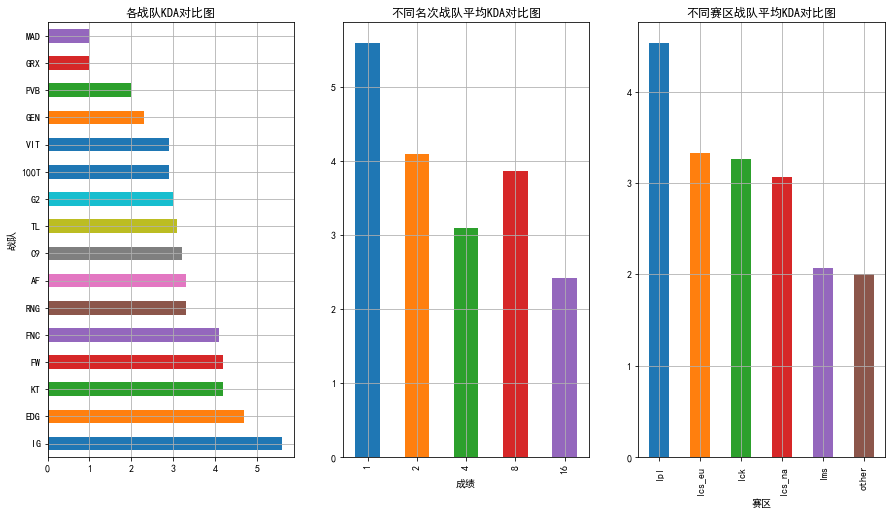

In [22]:
#先分析队伍的KDA
atk_plot('KDA')

KDA能看出强队的水平，KDA高的队伍在团战方面表现更好  
* 可以看出，IG战队KDA超过5，明显高于其他战队  
* 紧接着的是EDG，KT战队，拿到亚军的FNC战队KDA超过4，但只排在第五  
* 注意到EDG战队，以及FW战队的KDA明显高出其所在名次的平均水平，可以认为团战方面的稳健表现高于同名次的其他队伍  
* 拿到4强的队伍KDA比较低，可见赛程的对手赢得并不轻松  
* lms赛区的MAD、GRX战队KDA垫底，仅为1，水平与其他战队有差距
* 对于赛区来说，lpl的表现独一档，其他lcs_na,lcs_eu,lck差别不大  
* 仅拿到16强的lms赛区和外卡赛区KDA很低，只有2左右，可见整体水平跟其他赛区有比较大的差距  

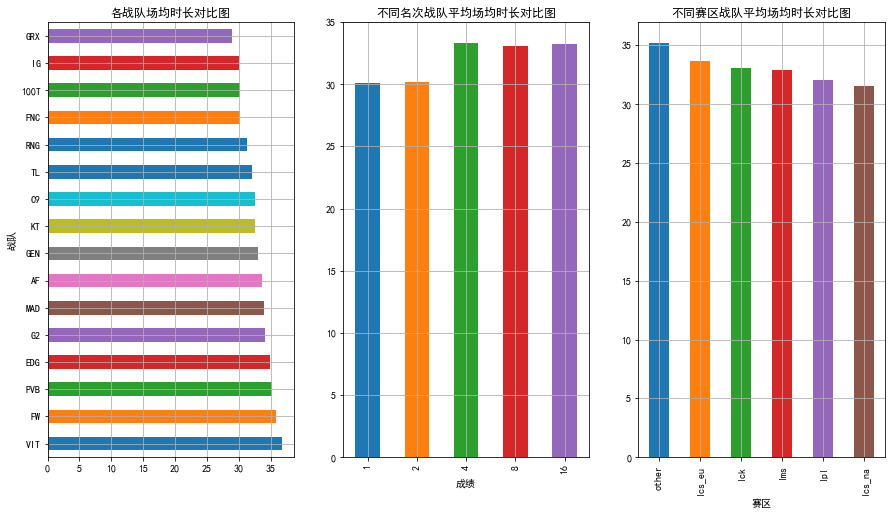

In [23]:
atk_plot('场均时长')

场均时长主要体现了队伍的风格和强队结束比赛的能力，越强或越弱的战队的场均时长均越短  
* 可以看出，冠亚军的比赛节奏明显快于其他队伍，也即高出其他名次队伍一个档次  
* lcs_eu的VIT战队场均时长最高，超过35分钟，而lms的FW战队次之，说明遇到的对手水平相当  
* 而GRX作为十六强则为反例，被结束比赛的时常最短，说明水平跟其他队伍差距很大，结合KDA可以看出，GRX战队水平要比MAD更低  
* 注意到外卡的PVB战队，场均时长达到35分钟，结合较低的KDA，可见虽然实力不足，但表现还是达到预期

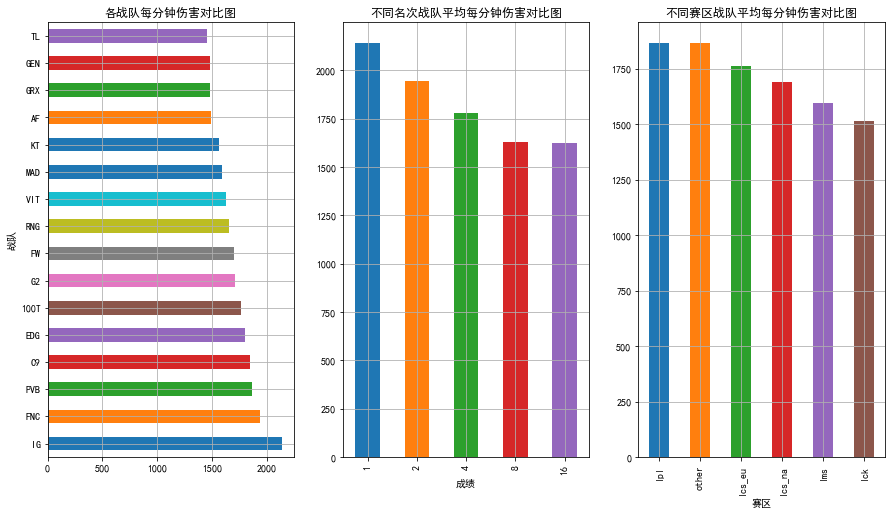

In [24]:
atk_plot('每分钟伤害')

分均伤害能体现战队的风格倾向，分均伤害越高，战队风格越偏向于团战，倾向于通过团战策略来打开局面  
* 可以看到，IG的分均伤害超过2000，高于其他战队一个档次，紧随其后的是FNC战队，均为团战风格战队  
* 注意到外卡赛区的PVB战队，分均伤害仅次于IG，FNC之后，也是团战风格的队伍  
* G2，FW的分均伤害处于战队的中间值，分均伤害少于G2，FW的强队一般偏向于运营风格  
* 从成绩上看，名次越高的分均伤害也越高  
* 从赛区上看，除了lpl，lcs_eu的团战能力要强于lcs_na，而lck赛区分均伤害最低，是典型的以避战运营策略为主流的赛区

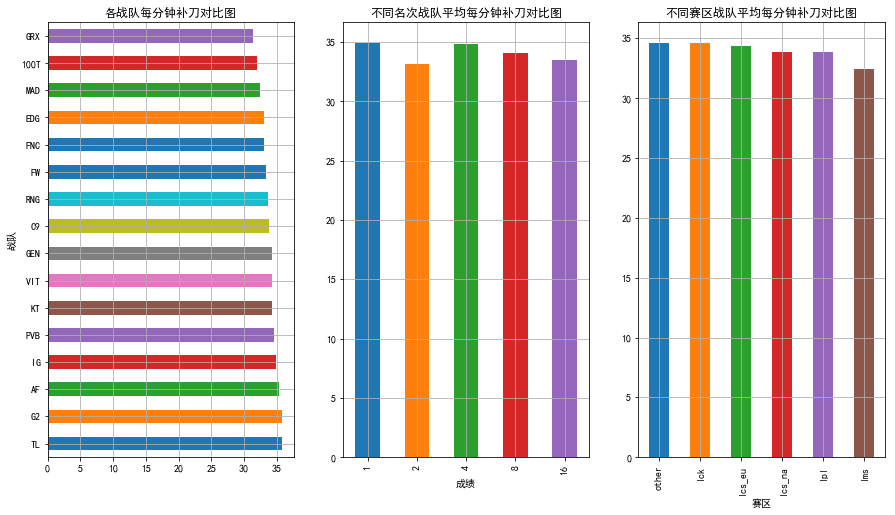

In [25]:
atk_plot('每分钟补刀')

补刀是团队经济的主要来源，是队伍的基本实力体现  
* 可以看出，GRX战队每分钟补刀最少，但仍有30以上，来自外卡赛区的PVB战队每分钟补刀也接近35  
* 从成绩，赛区的情况来看，各战队的补刀水平相差不大，可以说世界顶尖队伍的基本功都很不错  

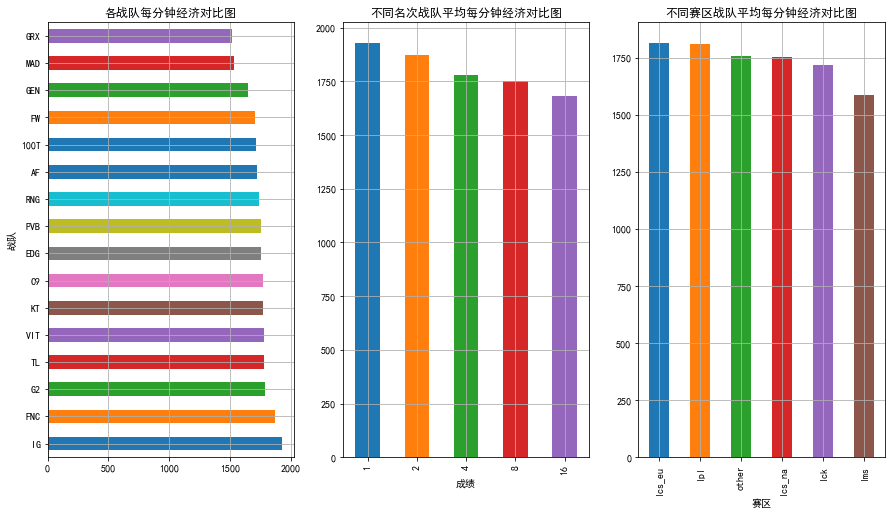

In [26]:
atk_plot('每分钟经济')

分均经济能体现战队获取游戏经济的能力，是一个战队的实力体现，分均经济除了补刀之外，包括击杀英雄，占领资源等  
* 可以看到除了冠亚军的IG和FNC外，其余战队分均经济相当，MAD和GRX战队还是垫底  
* 结合补刀数据可以看出，分均经济和成绩呈正相关，也即多为优势方拿下比赛  
* 从赛区来看，除了lms赛区分均经济比较低之外，各大赛区战队的经济获取能力都还算不错

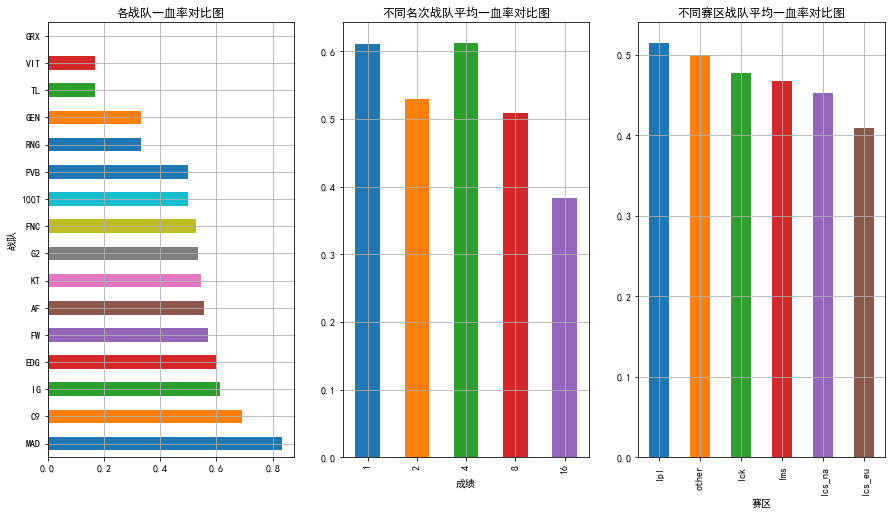

In [27]:
atk_plot('一血率')

一血率主要取决于是团队阵容和前期节奏  
* 可以看到，成绩16强的MAD却能拿到超过80%的一血率，可见前期节奏表现不错  
* 从成绩上看，16强战队的一血率最低  
* 从赛区上看，lpl赛区一血率是最高的，lcs_na和lcs_eu赛区一血率最低  

### 3.1.2 视野端分析

In [28]:
#定义画图函数，成对分析战队的视野端数据
def eye_plot(col1,col2):
    fig,[ax1,ax2,ax3]=plt.subplots(nrows=1,ncols=3)
    s8_team.set_index('战队').sort_values(by=[col1],ascending=False)[[col1,col2]].plot.barh(ax=ax1,grid=True)
    ax1.set_title('各战队%s与%s对比图'%(col1,col2))
    s8_team.set_index('战队').groupby('成绩')[[col1,col2]].mean().plot.bar(ax=ax2,grid=True)
    ax2.set_title('不同名次战队平均%s与%s对比图'%(col1,col2))
    s8_team.set_index('战队').groupby('赛区')[[col1,col2]].mean().sort_values(by=[col1],ascending=False).plot.bar(ax=ax3,grid=True)
    ax3.set_title('不同赛区战队平均%s与%s对比图'%(col1,col2))
    

> 部分数据有相关性，更适合成对分析，尤其视野端有关资源的数据

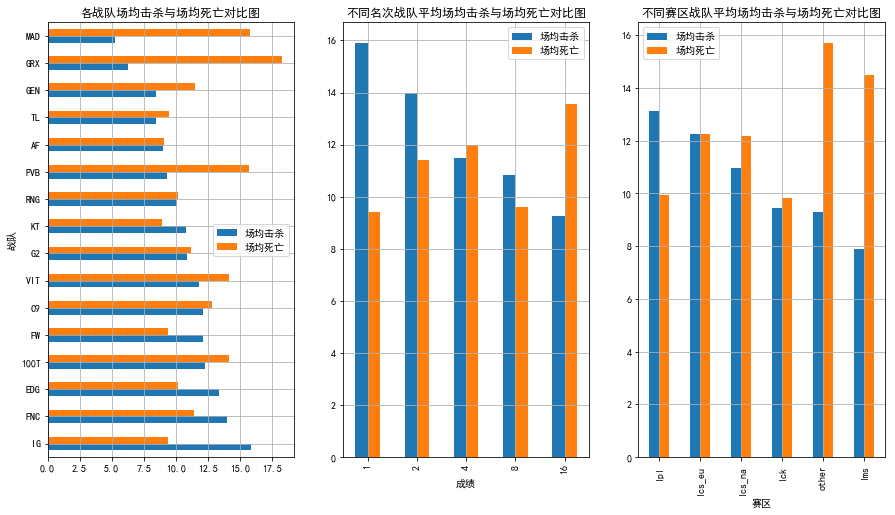

In [29]:
#击杀，死亡数属于进攻端数据，但适合成对分析
eye_plot('场均击杀','场均死亡')

战队的场均击杀、死亡数不仅能体现战队水平，也能体现战队风格倾向，场均击杀、死亡数越低表明战队越偏向于运营的风格  
* 可以看到，IG战队有着最高的场均击杀数，超过15个，而场均死亡数却最少，表现独一档  
* FNC、EDG战队的场均击杀数也明显比死亡数多，团战表现不错  
* 而100T、C9、VIT战队这样场均击杀数和死亡数都高，且场均死亡数要高于击杀数的战队是偏向于团战风格的，但实力相较对手有所欠缺  
* 场均击杀数和死亡数相当，都比较低的战队，如G2、KT、RNG，是偏向于运营风格的战队  
* 而PVB、GRX、MAD战队，击杀数远小于死亡数，表明实力水平与对手相差较大  
* 从赛区上看，lpl高击杀数低死亡数，整体偏向团战风格且水平较其他赛区高，lcs_na和lcs_eu赛区场均击杀和死亡数都高，整体偏向团战风格  
* 而lck赛区场均击杀和死亡数都低，整体偏向运营风格，lms和外卡赛区场均击杀数远小于死亡数，水平较其他赛区有差距

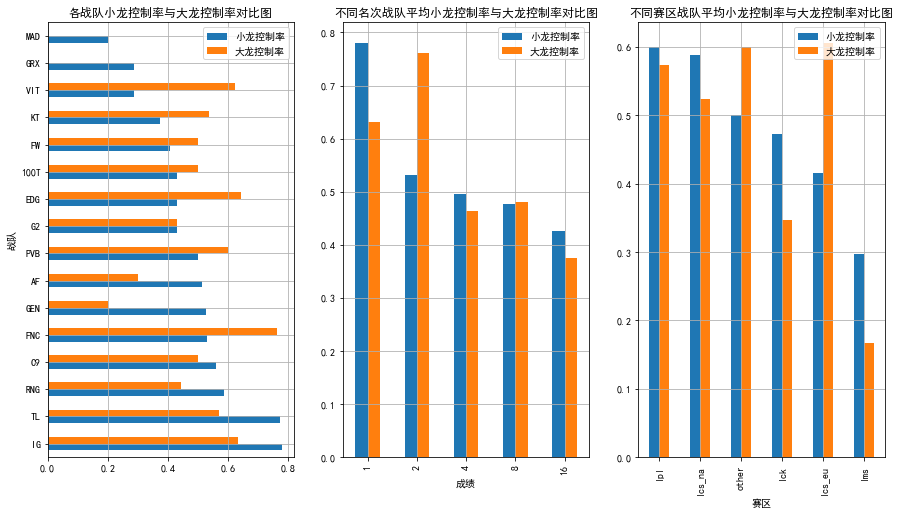

In [30]:
#观察重要的中立资源控制
eye_plot('小龙控制率','大龙控制率')

小龙、大龙这类中立资源的控制与战队强弱，战队的战术策略相关，但在资源争夺上有一定运气成分尤其是大龙  
* IG、TL战队的小龙控制率最高，接近80%，而TL战队名次仅16名，可见其在小龙争夺上执行的策略很成功  
* 而大龙控制率上FNC战队最高，超过70%，而MAD、GRX大龙控制率为0，可见跟对手的实力有差距，无力争夺大龙  
* 从赛区来看，lck赛区偏向运营却只有不到40%大龙控制率，与其他主要赛区相比差距不小，可见队伍整体表现不如对手

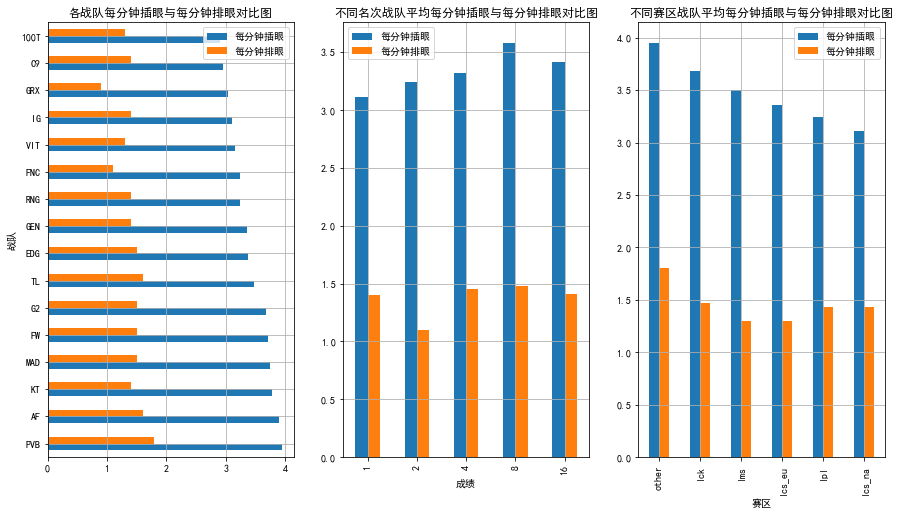

In [31]:
#观察视野的控制情况
eye_plot('每分钟插眼','每分钟排眼')

分均插眼，排眼数据体现了队伍的视野控制能力强弱，分均插眼、排眼越多，队伍的视野控制效率越强  
* 可以看到，很意外外卡赛区的PVB战队分均插眼、排眼均为最高，说明战队对视野策略的执行很成功
* 紧接其后的AF、KT同属lck赛区，占据二三位，也有很高的分均插眼、排眼数，与其一贯的运营策略有关  
* 而IG，FNC作为冠亚军，分均插眼、排眼数量却比较少，视野控制一般  
* 从赛区上来看，除了一只外卡队，lck赛区的视野控制效率最高，其次是lms赛区，lpl和lcs_na的视野控制效率是比较差的

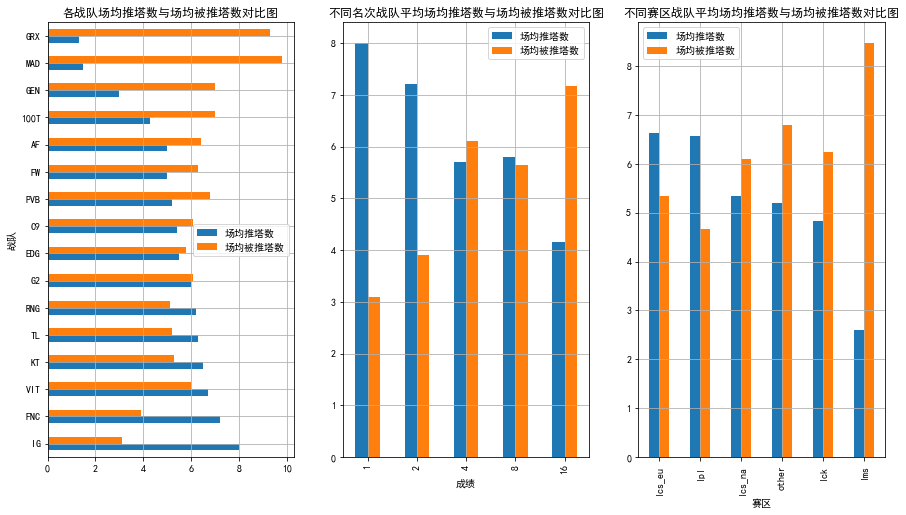

In [32]:
eye_plot('场均推塔数','场均被推塔数')

场均推塔数和被推塔数也能体现队伍强弱
* 可以看出，IG的场均推塔数最高，达到8，而被推塔数最低，仅3左右，说明比赛全程整体是轻松取胜的，实力高出对手不少  
* 类似KT、TL、RNG这样，场均推塔数和被推塔数相当的，说明比赛过程比较焦灼  
* 而100T、GEN、MAD、GRX这样，场均推塔数明显小于被推塔数，说明实力明显不及对手

## 3.2 战队分析小结

> 赛区方面：
* lpl，lcs_eu，lcs_na整体是偏向团战风格的赛区，lck，lms整体是偏向运营风格的赛区
* lpl赛区整体实力最强，lcs_eu次之，lcs_na和lck相当，lms赛区整体最弱
* lck赛区视野控制效率方面最强，lms次之，lcs_eu和lpl差不多，lcs_na视野控制最差

> **战队方面**：
* IG战队多项数据领先，甚至明显高出第二名，除视野控制方面有待加强，属于团战风格的独一档水平战队
* FNC战队整体数据也不错，仅次于IG，但视野控制方面也有待加强，属于团战风格的高水平战队
* C9战队整体数据靠前，部分数据平均水平，视野控制方面有些落后，属于团战风格的中高水平战队
* G2战队整体数据中上水平，部分数据靠前，视野控制方面平均水平，属于运营风格的中高水平战队
* EDG战队整体数据靠前，部分数据平均水平，视野控制方面不错，属于团战风格的中高水平战队
* RNG战队整体数据一般，部分数据靠前，视野控制方面平均水平，属于运营风格的中等水平战队
* KT战队整体数据靠前，部分数据平均水平，视野控制方面不错，属于运营风格的中高水平战队
* AF战队整体数据一般，部分数据靠前，视野控制方面不错，属于运营风格的中等水平战队
* VIT战队整体数据一般，少数数据靠前，视野控制方面平均水平，属于团战风格的中等水平战队
* FW战队整体数据一般，部分数据靠前，视野控制方面不错，属于运营风格的中等水平战队
* TL战队整体数据一般，部分数据靠前，视野控制方面平均水平，属于运营风格的中等水平战队
* GEN战队整体数据中下水平，视野控制方面平均水平，属于运营风格的中低水平战队
* PVB战队整体数据中下水平，少数数据靠前，视野控制方面不错，属于团战风格的中低水平战队
* 100T战队整体数据中下水平，视野控制方面有些落后，属于团战风格的低水平战队
* MAD战队整体数据垫底水平，少数数据靠前，视野控制方面不错，属于运营风格的低水平战队
* GRX战队整体数据垫底水平，视野控制方面有些落后，属于团战风格的低水平战队

In [33]:
#根据分析结果添加‘风格’，‘水平’到战队数据表中
style={'IG':'团战','FNC':'团战','C9':'团战','G2':'运营','EDG':'团战','RNG':'运营','AF':'运营','KT':'运营','VIT':'团战',
       'FW':'运营','PVB':'团战','GEN':'运营','100T':'团战','MAD':'运营','GRX':'团战','TL':'运营'}
s8_team['风格']=s8_team['战队'].apply(lambda x:style[x])

level={'IG':'独一档','FNC':'高','C9':'中高','G2':'中高','EDG':'中高','RNG':'中等','AF':'中等','KT':'中高','VIT':'中等',
       'FW':'中等','PVB':'中低','GEN':'中低','100T':'低','MAD':'低','GRX':'低','TL':'中等'}
s8_team['水平']=s8_team['战队'].apply(lambda x:level[x])

## 3.3 选手分析

In [34]:
#定义画图函数，分析评估选手的实力
def carry_assess(position,indicator):
    plt.rcParams['font.sans-serif'] =['SimHei']
    fig,[ax1,ax2,ax3]=plt.subplots(nrows=1,ncols=3)
    s8_player[s8_player['位置']==position].set_index('战队')[indicator].sort_values(ascending=False).plot.barh(ax=ax1,grid=True)
    ax1.set_title('各战队%s之%s对比'%(position,indicator))
    s8_player[s8_player['位置']==position][indicator].plot.box(ax=ax2,grid=True)
    ax2.set_title('各战队%s之%s分布'%(position,indicator))
    s8_player[s8_player['位置']==position].set_index('战队').groupby('成绩')[indicator].mean().sort_values(ascending=False).plot.bar(ax=ax3,grid=True)
    ax3.set_title('不同名次战队%s平均%s对比'%(position,indicator))
    

> 选手的分析上，不同位置的选手选用的**评价指标**可能不同：
* ADC:主要评价指标为KDA，输出占比，参团率，伤害转化率也即单位经济下的伤害输出量
* 中单：同为C位，评价指标同ADC
* 上单：主要评价指标为KDA，参团率，输出占比，承受伤害占比
* 打野：主要评价指标同上单
* 辅助：主要评价指标为参团率，每分钟插眼数，每分钟排眼数

In [35]:
#对于c位，添加伤害转化率字段
s8_player['伤害转化率']=s8_player['每分钟输出']/s8_player['GPM']

### 3.3.1 ADC分析

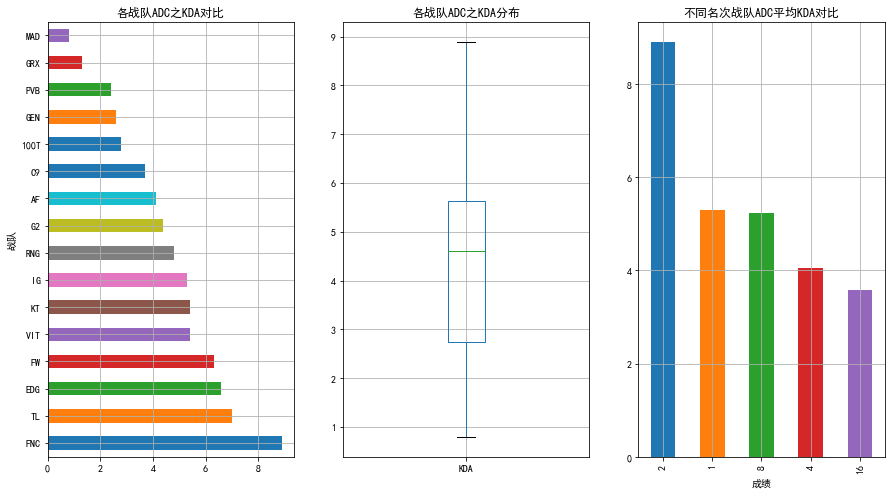

In [36]:
carry_assess('ADC','KDA')

KDA是评价C位团战能力的重要指标，一般情况下，KDA越高说明C位团战能力越强
* 可以看到，ADC的KDA数据差距极大，FNC的ADC的KDA取得极大值，超过8，可以看出其生存能力高于其他ADC
* TL、EDG、FW战队ADC的KDA也较高，都超过6，战队应是围绕着ADC组织战术
* 注意到IG战队的KDA只有中等水平，而IG水平是高于其他队伍的，可见ADC在队内并非战术核心点
* 从名次来看，八强战队ADC的KDA明显高于四强的队伍，可以认为在这些队伍里ADC的地位应比其他位置更为侧重

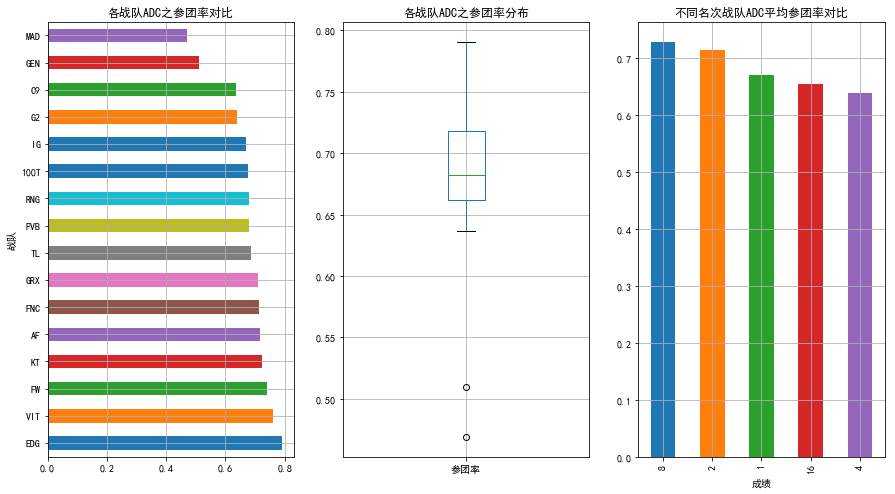

In [37]:
carry_assess('ADC','参团率')

参团率是评价任何位置的重要指标，能体现出战队的战术布置和对战双方的节奏走向    
* 可以看到，绝大部分ADC参团率在0.66-0.72之间，EDG和VIT两支队伍的ADC参团率偏高，两者在围绕下路进行团战的次数更为频繁
* 而作为冠亚军的IG和FNC战队的ADC参团率并不算高，说明了战队重点是在中上野体系，由上半部打开局面，ADC为后期的保障
* 从成绩上看，八强战队的ADC参团率最高，超过70%，说明了队内重点在于下路体系，围绕着下路布置战术

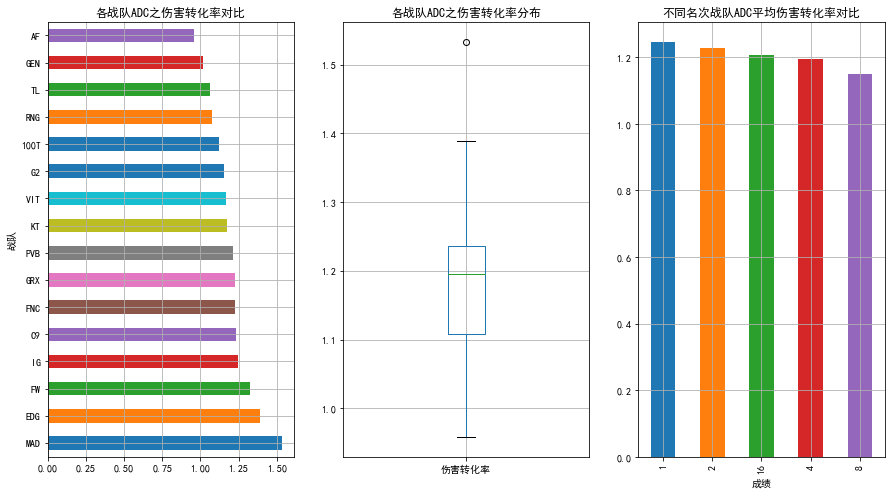

In [38]:
carry_assess('ADC','伤害转化率')

伤害转化率是衡量C位的输出能力的重要指标，一般情况下，伤害转化率越高，输出能力越强
* MAD战队ADC的伤害转化率最高，超过150%，作为战绩垫底的战队，说明ADC的表现很不错
* EDG、FW战队ADC的伤害转化率也不错，均超过125%，可见围绕ADC的战术执行的比较成功
* 而TL、VIT、KT战队的ADC伤害转化率就只在平均水平，达到120%左右
* 从成绩上看，八强战队的ADC伤害转化率比较低，结合KDA和参团率来看，整体上八强战队围绕ADC的打法未能收效

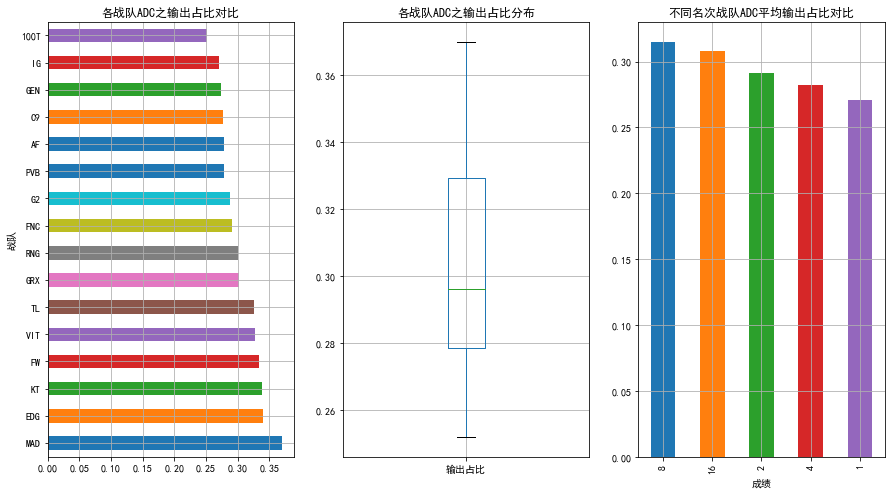

In [39]:
carry_assess('ADC','输出占比')

输出占比也是衡量C位输出能力的重要指标，能体现C位的输出能力，但更能体现队伍的战术配置侧重
* 可以看到，ADC平均输出占比接近30%，MAD的ADC输出占比最高，超过了35%
* EDG、KT、FW、VIT、TL的ADC输出占比也较高，均超过了30%，这些队伍下路都是重要的核心
* 从成绩上可以看出，ADC输出占比多的八强或十六强，而占比少的成绩更好点，尤其IG，ADC打出了很高的伤害转化率，但输出占比仍旧比较低

### 3.3.2 中单分析

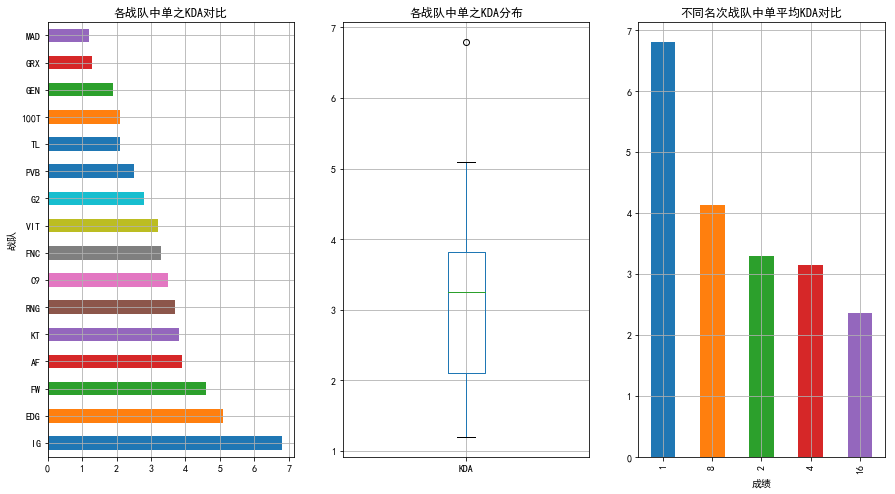

In [40]:
carry_assess('中单','KDA')

可以看出：
* IG中单的KDA最高，接近7的KDA，明显高出其他中单
* 中单的KDA平均约3.2，各战队中单KDA差距很大
* EDG、FW中单的KDA也较好，均超过4，说明中单也是队内关键核心
* 注意到亚军战队FNC中单比较低，仅达到平均水平
* 从成绩上看，四强中单的KDA比八强的要低不少，可见晋级过程中单死亡数不少

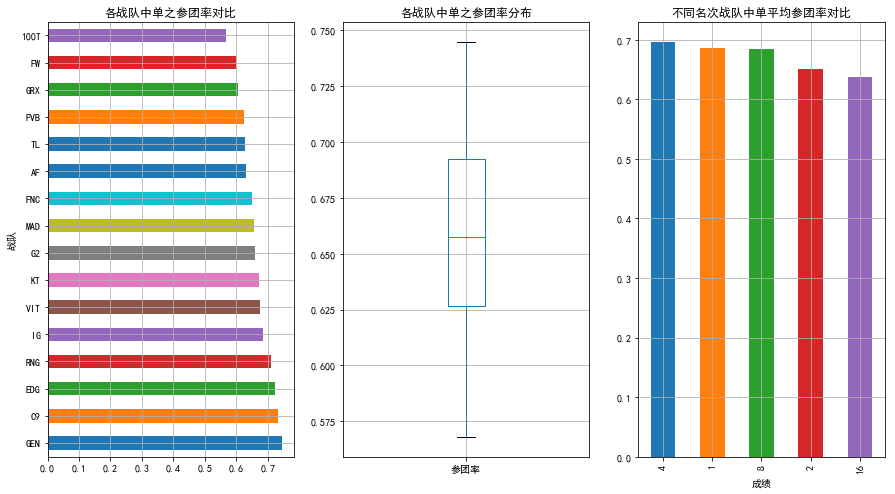

In [41]:
carry_assess('中单','参团率')

可以看出：
* 中单参团率平均值约66%，各战队中单参团率相对比较均匀
* 从成绩上看，四强，八强以及冠军的中单参团率相当，但亚军战队的中单参团率略低

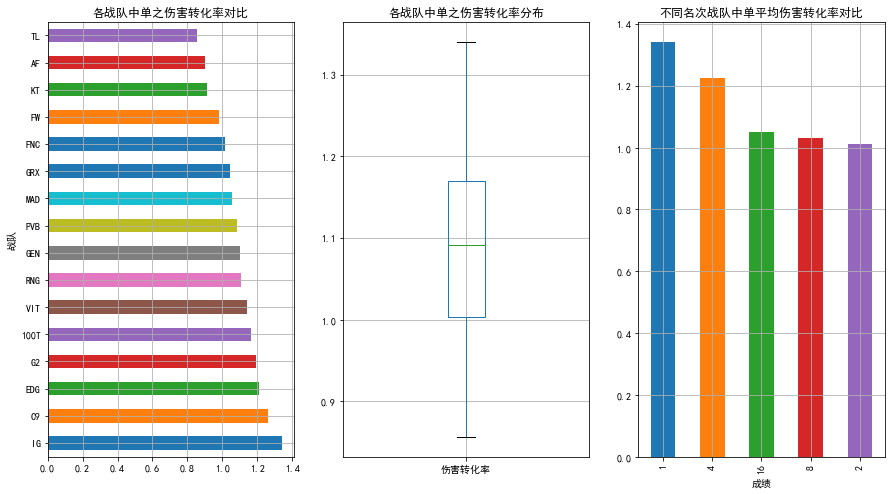

In [42]:
carry_assess('中单','伤害转化率')

可以看出：
* IG战队的中单伤害转化率高出一截，直逼140%，结合KDA和参团率数据，可以认为IG中单水平高出其他中单一个档次
* C9、EDG的中单伤害转化率也不错，都超过120%
* 从成绩上看，四强的中单伤害转化率很高，结合低KDA和高参团率，可以认为四强中单在比赛上有不错的表现
* 而亚军中单伤害转化率比较低，结合之前的KDA和参团率数据，总体表现一般

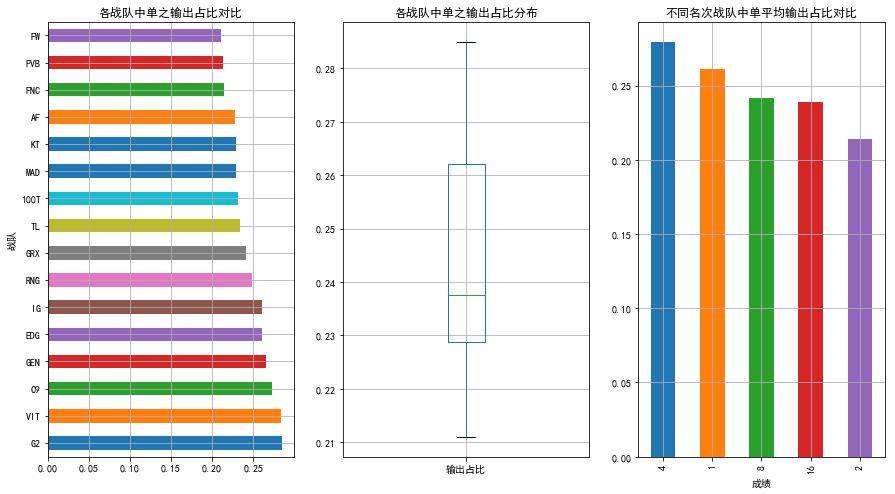

In [43]:
carry_assess('中单','输出占比')

可以看到：
* G2、VIT、C9中单输出占比比较高，均超过25%
* 从成绩上看，输出占比上四强中单领先，结合ADC占比来看，四强中单的位置比ADC更为侧重
* 而输出占比上，第二名的中单仍旧垫底，甚至不如十六强的中单，未打出名次对应的水准

### 3.3.3 上单分析

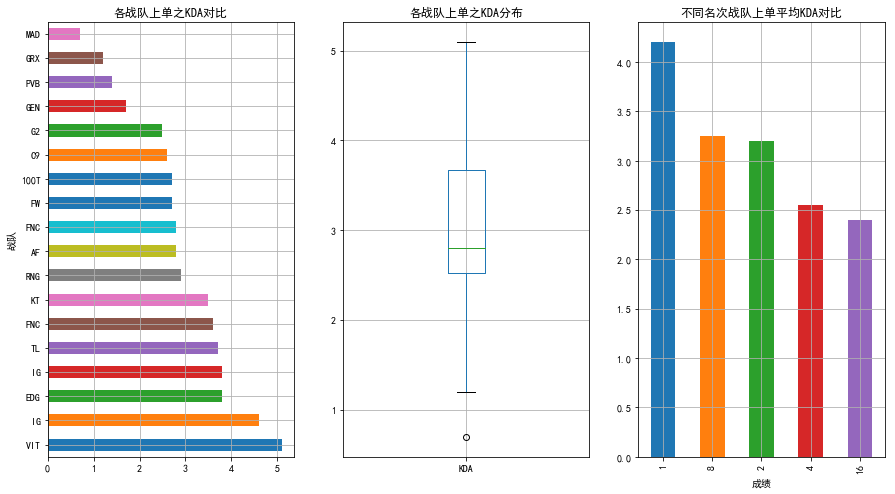

In [44]:
carry_assess('上单','KDA')

可以看到：
* 上单的KDA均值不到3，VIT,IG上单KDA远超其他上单
* 这里出现有个IG、FNC上单，因为两队都有替补上单上场

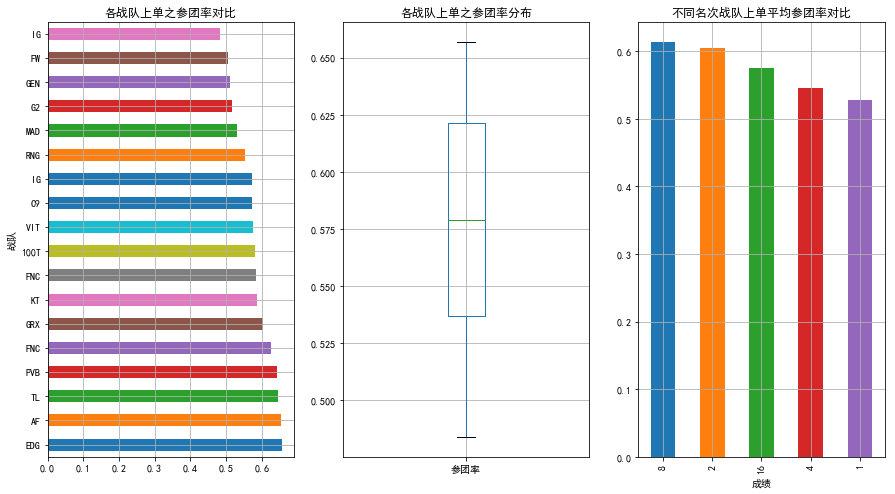

In [45]:
carry_assess('上单','参团率')

可以看到：
* 上单参团率均值约57.5%，EDG，AF、TL、PVB、FNC上单的参团率较高，都超过60%
* IG上单的参团率不高，不到60%，且可看到两个IG上单的参团率有明显差距，替补上单参团率垫底
* 从名次来看，八强上单的平均参团率最高，亚军上单次之，最低的是冠军上单的平均参团率，应是受到了替补上单的数据影响

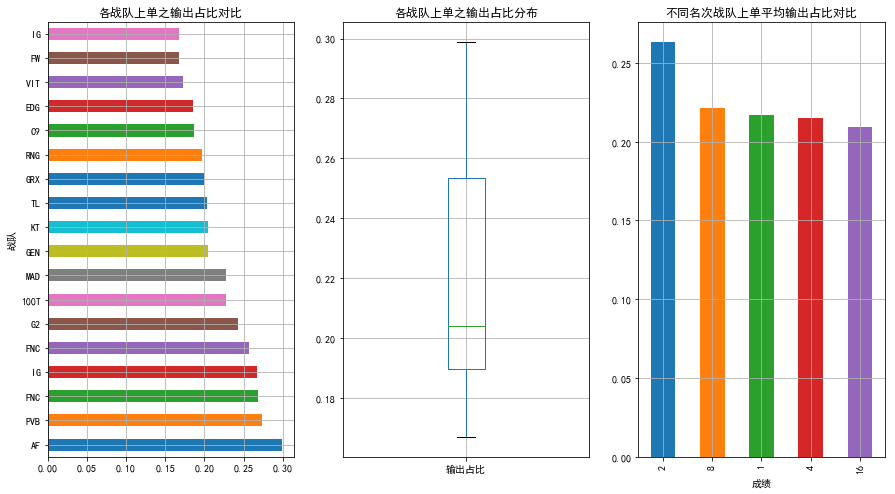

In [46]:
carry_assess('上单','输出占比')

上单的输出占比体现了战队的战术配置和选手的个人能力，一般情况下，输出占比越高，上单输出能力越强，更多是作为核心点之一
可以看到：
* 上单平均输出占比约20%，AF战队上单输出占比非常高，接近30%
* 紧随其后的PVB、FNC、IG、G2、100T、MAD上单都有不错的伤害输出占比，可见上单位在队内也是核心位置之一
* FNC的两个上单输出占比相当，都占据前列，而IG两个上单输出占比差距极大，替补上单又是垫底

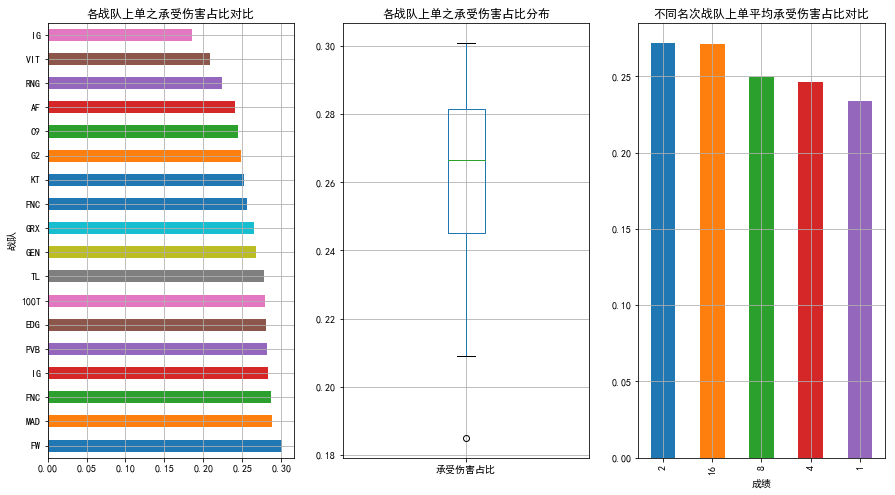

In [47]:
carry_assess('上单','承受伤害占比')

上单的承伤占比也体现了战队的战术配置和选手的团队作用，一般情况下，承伤占比越高，上单团队贡献越大，起到的是主坦或副坦的主要作用
可以看到：
* 上单平均承伤占比约26.5%，FW的上单承伤占比是最高的，接近30%
* 紧随其后的MAD、FNC、IG、PVB、EDG、100T、TL上单承伤占比也不错，均超过25%，团队贡献不错
* 同样的，FNC的两个上单承伤占比相近，结合KDA、参团率、输出占比可知，这两个上单都有不错的水平
* 而IG两个上单承伤占比又是相差甚远，结合之前数据可知，一个上单水平很高，另一个上单则是垫底水平

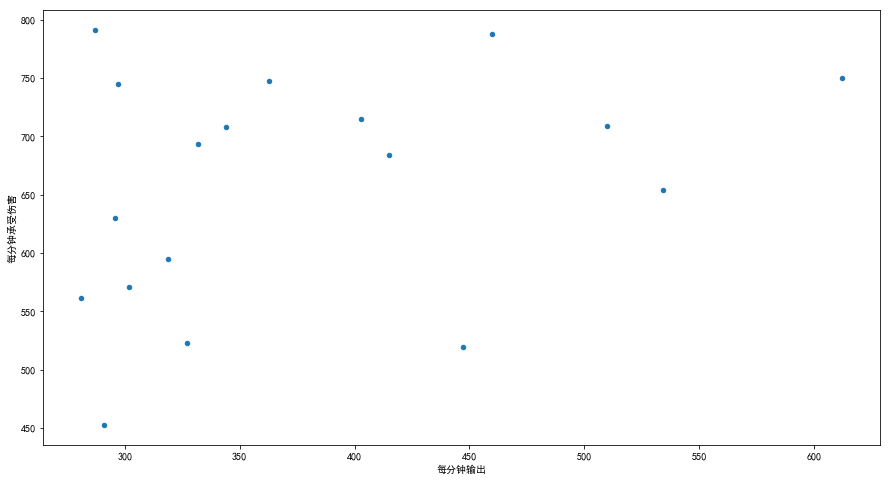

In [48]:
#特别的，对各上单进行每分钟输出/每分钟承担伤害进行二维分析
s8_player_top=s8_player[s8_player['位置']=='上单']
#先观察分布情况
s8_player_top.plot.scatter('每分钟输出','每分钟承受伤害',legend=True)

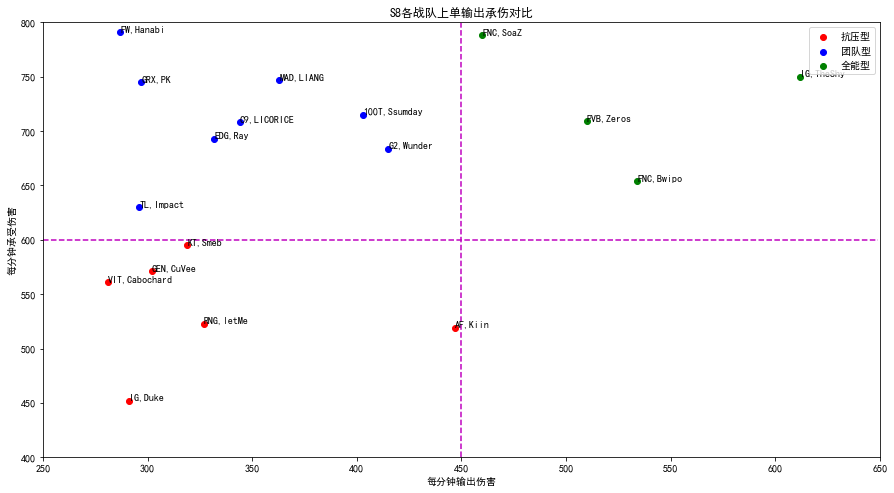

In [49]:
#根据分布，以每分钟输出450，每分钟承受伤害650为界线分成四个区间

plt.scatter(s8_player_top[(s8_player_top['每分钟输出']<=450) & (s8_player_top['每分钟承受伤害']<=600)]['每分钟输出'],
s8_player_top[(s8_player_top['每分钟输出']<=450) & (s8_player_top['每分钟承受伤害']<=600)]['每分钟承受伤害'],color='r',label='抗压型')

plt.scatter(s8_player_top[(s8_player_top['每分钟输出']<=450) & (s8_player_top['每分钟承受伤害']>600)]['每分钟输出'],
s8_player_top[(s8_player_top['每分钟输出']<=450) & (s8_player_top['每分钟承受伤害']>600)]['每分钟承受伤害'],color='b',label='团队型')

plt.scatter(s8_player_top[(s8_player_top['每分钟输出']>450) & (s8_player_top['每分钟承受伤害']>600)]['每分钟输出'],
s8_player_top[(s8_player_top['每分钟输出']>450) & (s8_player_top['每分钟承受伤害']>600)]['每分钟承受伤害'],color='g',label='全能型')

#设置区间，参数
plt.ylim(400,800)
plt.plot(400*[450],range(400,800),'m--')
plt.xlim(250,650)
plt.plot(range(250,650),400*[600],'m--')
plt.xlabel('每分钟输出伤害')
plt.ylabel('每分钟承受伤害')
plt.legend()
plt.title('S8各战队上单输出承伤对比')

#添加标签，更易观察
for x,y,s1,s2 in zip(s8_player_top['每分钟输出'],s8_player_top['每分钟承受伤害'],s8_player_top['战队'],s8_player_top.reset_index()['选手']):
    plt.text(x,y,s1+','+s2)

可以看出：
* IG战队的上单Theshy输出和承伤都非常高，分均输出超过600，分均承伤接近750，总体与其他战队的上单选手拉开不小差距，可以认为水平是独一档的
* 而对于IG的另一个上单Duke选手，分均输出和分均承伤都非常低，形成鲜明对比
* FNC的两名上单选手总体表现都很不错，属于全能型的上单
* 注意到外卡赛区PVB战队的上单Zeros，在战队成绩很差的情况下还能有超过的分均伤害和约700的分均承伤，表现非常不错，属于战队的核心选手
* AF战队和KT战队的上单分均输出或分均承伤有一项不够高，表现差强人意

### 3.3.4 打野分析

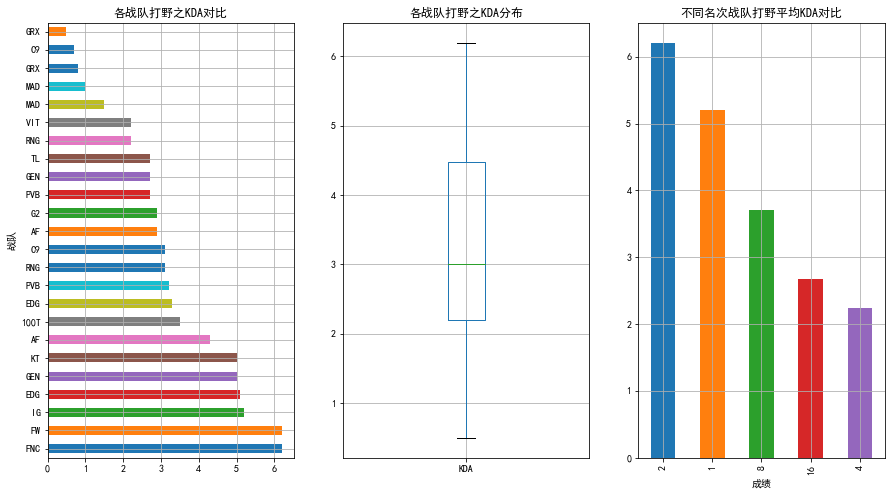

In [50]:
carry_assess('打野','KDA')

可以看到：
* FNC、FW的打野KDA明显高出其他打野，均超过6，打野平均KDA只有3
* IG、EDG、GEN、KT打野的KDA也不错，均超过5
* 注意到多个战队有替补打野上场，如EDG、AF、RNG、C9、MAD等，且两个打野数据差别比较大
* 比较多的队伍替补位置选择打野，可见打野对战术安排的重要性（每个队伍只能有一名替补）

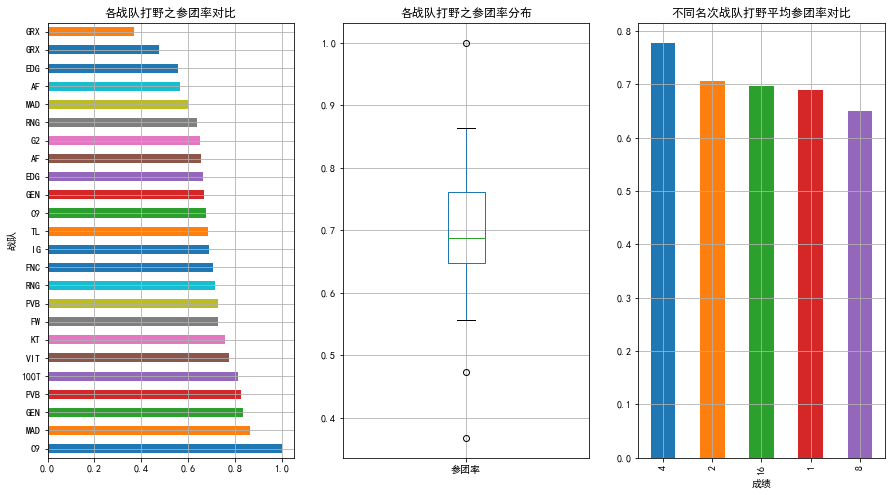

In [51]:
carry_assess('打野','参团率')

可以看到：
* 打野的平均参团率达到了近70%，高于队内其他位置，毫无疑问是场上节奏的带动者
* 注意到C9的一名打野，参团率高达100%，应该是场次较少的替补打野的，应排除
* MAD、GEN、PVB、100T打野的参团率都不错，均超过80%
* 从名次来看，八强打野的平均参团率最低，仅65%

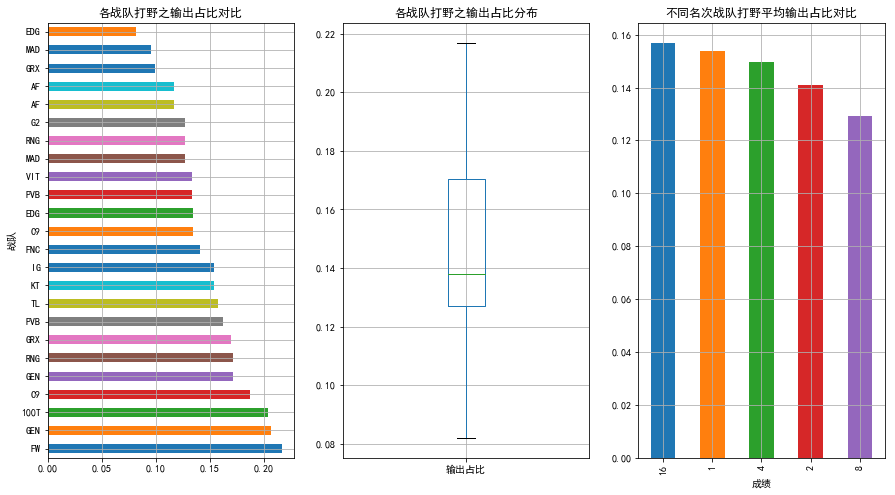

In [52]:
carry_assess('打野','输出占比')

可以看到：
* 打野平均输出占比接近14%，比较低，可见输出不是打野的第一要求
* FW、GEN、100T的打野输出占比很高，均超过20%，说明在队内打野也是核心位置之一
* 从名次上看，十六强打野的平均输出占比最高，紧随其后的是冠军打野，八强打野的平均输出占比最低

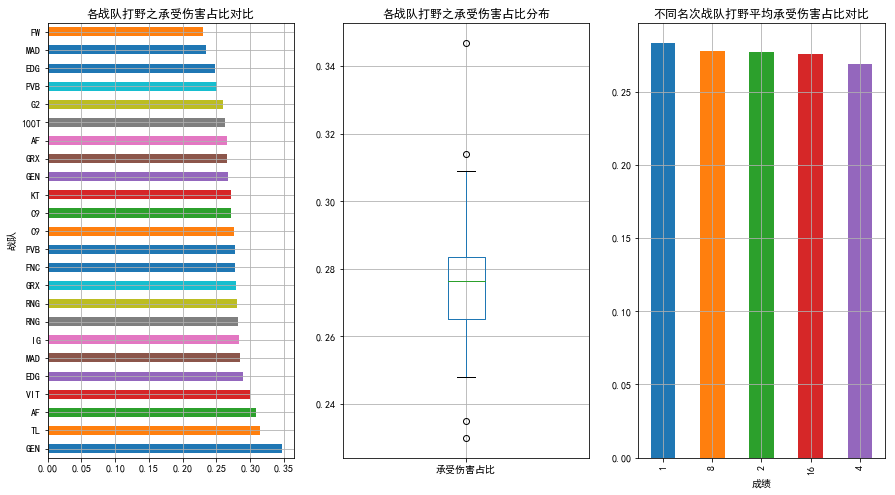

In [53]:
carry_assess('打野','承受伤害占比')

可以看到：
* 打野的承伤占比均值接近28%，各打野数据分布比较均匀，可见打野位承担着队内主坦或副坦的作用
* GEN打野的承伤占比最高，接近35%，紧随其后的有TL、AF、VIT的打野，承伤占比也不错，均超过30%
* 从成绩上看，各名次打野承伤占比非常均衡，约在27%左右

### 3.3.5 辅助分析

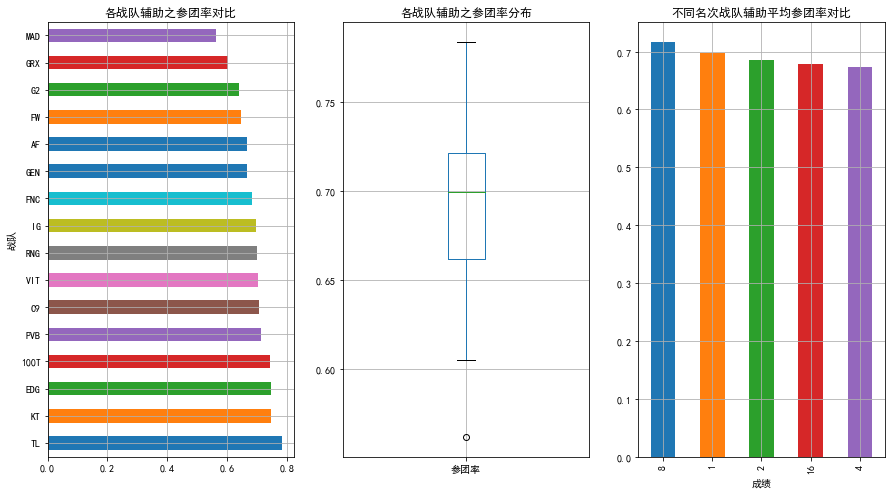

In [54]:
carry_assess('辅助','参团率')

可以看到：
* 辅助平均参团率在70%，各战队辅助参团率分布比较均匀
* TL、KT、EDG、100T辅助参团率不错，均超过70%
* 从成绩上看，辅助的平均参团率相当，差别不大

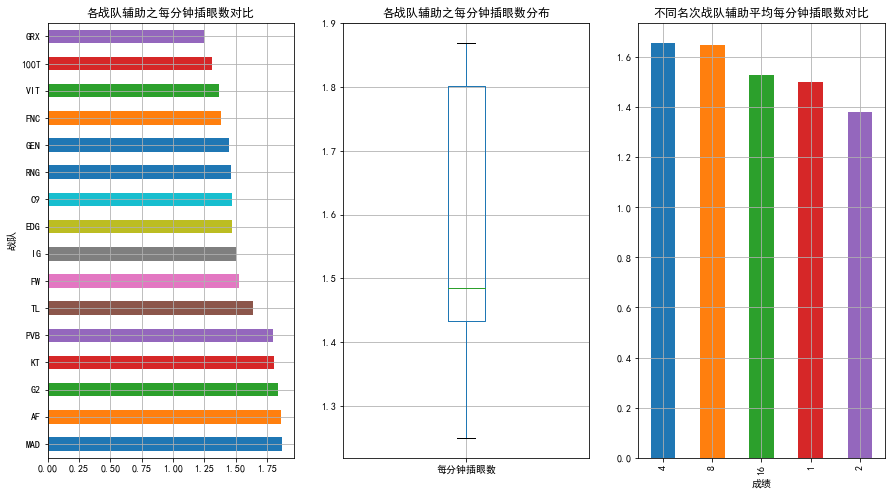

In [55]:
carry_assess('辅助','每分钟插眼数')

辅助的分均插眼数是衡量辅助视野控制能力的重要标准，一般情况下，分均插眼数越高，辅助的视野控制能力越强
* 辅助的分均插眼数均值接近1.5，各战队辅助分均插眼数有一定差距
* MAD战队的辅助分均插眼数最多，AF、G2、KT、PVB紧随其后，均超过1.75
* 从成绩来看，四强，八强辅助的分均插眼数量最多，而冠亚军的却明显比较少

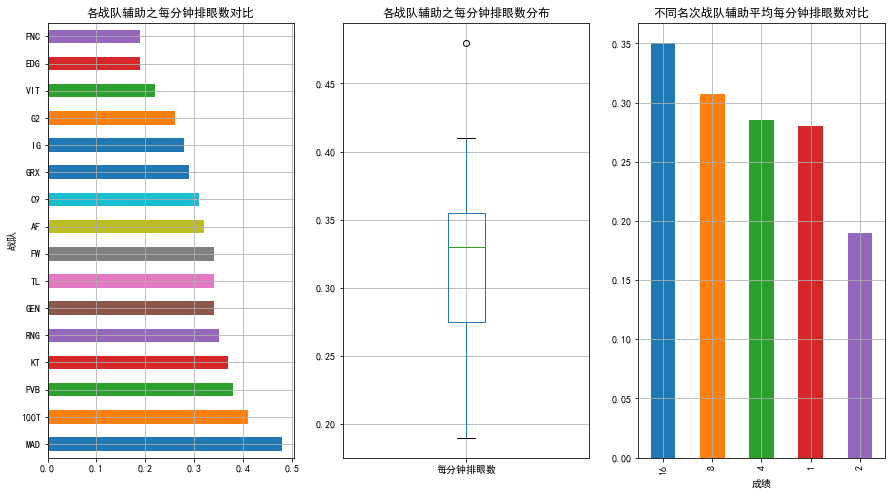

In [56]:
carry_assess('辅助','每分钟排眼数')

辅助的分均排眼数也是衡量辅助视野控制能力的重要标准，一般情况下，分均排眼数越高，辅助的视野控制能力越强
* 辅助的分均排眼数均值约0.33，各战队辅助要较大差距
* MAD战队的辅助分均排眼数最多，超过0.45，而分均排眼数最少的是FNC的辅助，不到0.2
* 从成绩来看，十六强辅助的平均分均排眼数第一，冠亚军的分均排眼数还是最少

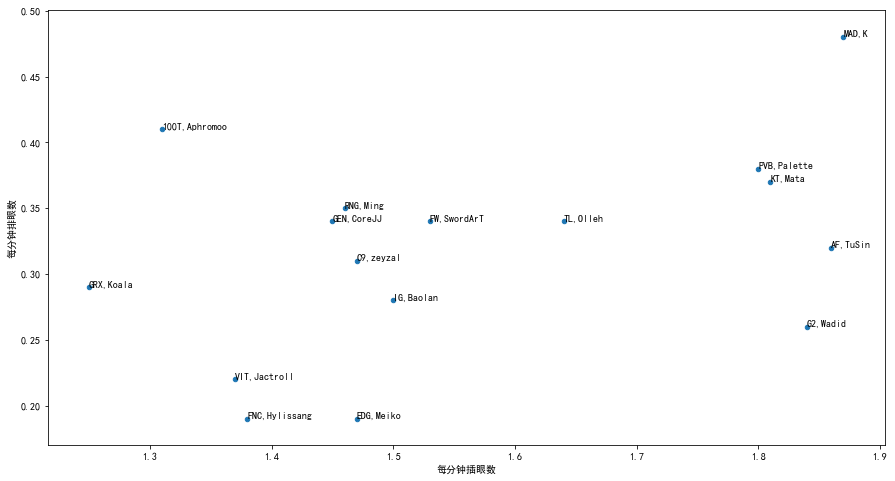

In [57]:
#分均插眼数和分均排眼数相关联，适合同时分析
s8_player_sup=s8_player[s8_player['位置']=='辅助']
s8_player_sup.plot.scatter('每分钟插眼数','每分钟排眼数',legend=True)

for x,y,s1,s2 in zip(s8_player_sup['每分钟插眼数'],s8_player_sup['每分钟排眼数'],s8_player_sup['战队'],s8_player_sup.reset_index()['选手']):
    plt.text(x,y,s1+','+s2)

可以看出：
* MAD战队的辅助视野控制最好，分均插眼数接近1.9，分均排眼数超过0.45
* PVB、KT、AF战队辅助的视野控制也不错，EDG、VIT战队辅助视野控制比较差
* 注意到IG，FNC，作为冠亚军战队，辅助的视野控制做的比较差，待改进

### 3.3.6 队内分析

In [58]:
#对队伍内部进行分析，探索团队内部战术分工
def proportion_assess(proportion):
    
    fig,ax=plt.subplots(nrows=4,ncols=4)
    ax_list=[]
    for iax in ax:
        for iiax in iax:
            ax_list.append(iiax)            
    for team,i in zip(s8_player['战队'].unique(),range(len(s8_player['战队'].unique()))):
        s8_player[s8_player['战队']==team].set_index('位置')[proportion].plot.pie(ax=ax_list[i],autopct='%.2f%%')
        ax_list[i].set_ylabel((None))
        ax_list[i].set_title('%s战队平均%s'%(team,proportion))
        

> 主要考察指标为输出占比和承伤占比

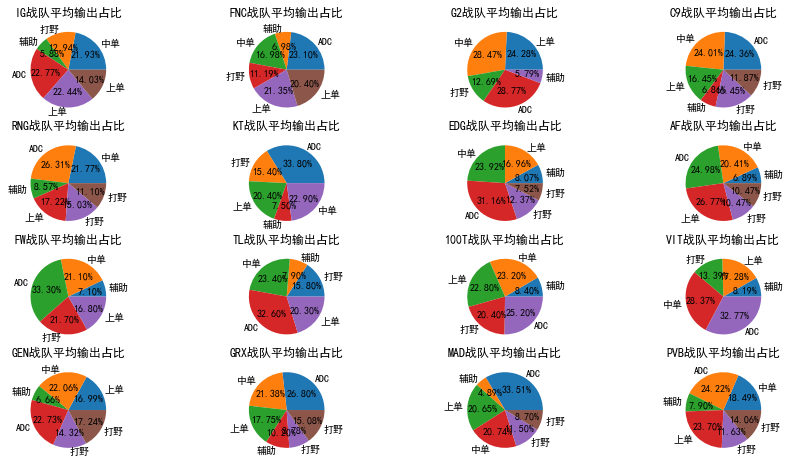

In [59]:
proportion_assess('输出占比')

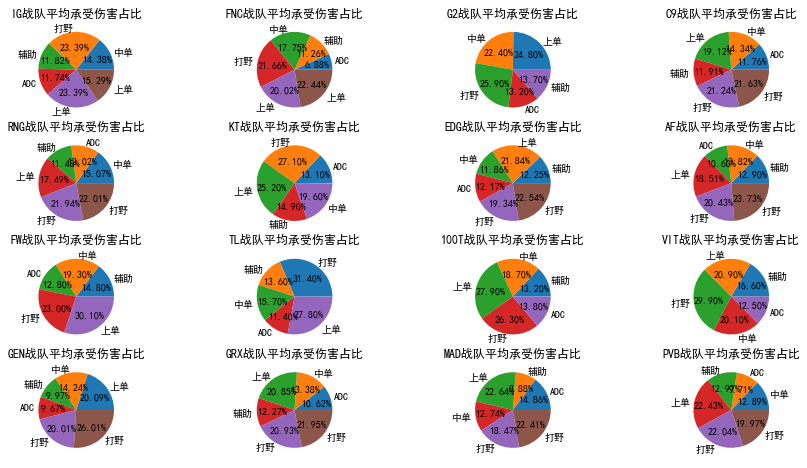

In [60]:
proportion_assess('承受伤害占比')

结合战队内部的输出占比和承伤占比图，可以看出：
* 各队的核心点位以及核心数，属于单核，双核，还是多核
* 能佐证之前关于选手的分析，并看出各选手在战队内的战术配置侧重

## 3.4 选手分析小结

> 各战队选手水平及战队体系：
* IG战队ADC数据中上水平，中单和上单水平独一档，打野水平中上，辅助水平中等，战术阵容属于中上野体系的三核心阵容
* FNC战队ADC数据中上水平，中单和上单水平独一档，打野水平中上，辅助水平中等，战术阵容属于中上野体系的三核心阵容
* C9战队ADC数据中等水平，中单和上单中上水平，打野水平中等，辅助水平中等，战术阵容属于中上野体系的三核心阵容
* G2战队ADC数据中等水平，中单和上单中上水平，打野水平中下，辅助水平中等，战术阵容属于中上野体系的三核心阵容
* EDG战队ADC数据中上水平，中单水平中上，上单水平中等，打野水平中等，辅助水平中下，战术阵容属于中下体系的双核心阵容
* RNG战队ADC数据中等水平，中单水平中等，上单水平中下，打野水平中下，辅助水平中等，战术阵容属于中下体系的双核心阵容
* KT战队ADC数据中上水平，中单水平中等，上单水平中等，打野水平中等，辅助水平中上，战术阵容属于中下体系的三核心阵容
* AF战队ADC数据中等水平，中单水平中等，上单水平中等，打野水平中下，辅助水平中上，战术阵容属于中上体系的双核心阵容
* VIT战队ADC数据中等水平，中单水平中上，上单水平中下，打野水平中等，辅助水平中下，战术阵容属于中野体系的双核心阵容
* FW战队ADC数据中上水平，中单水平中等，上单水平中下，打野水平中下，辅助水平中等，战术阵容属于中下体系的双核心阵容
* TL战队ADC数据中等水平，中单水平中下，上单水平中上，打野水平中等，辅助水平中上，战术阵容属于中下体系的双核心阵容
* GEN战队ADC数据中下水平，中单水平中等，上单水平中下，打野水平中上，辅助水平中等，战术阵容属于中下体系的双核心阵容
* PVB战队ADC数据中下水平，中单水平中下，上单水平中上，打野水平中等，辅助水平中上，战术阵容属于中上野体系的双核心阵容
* 100T战队ADC数据中下水平，中单水平中下，上单水平中上，打野水平中等，辅助水平中等，战术阵容属于中上野体系的三核心阵容
* MAD战队ADC数据中等水平，中单水平中下，上单水平中等，打野水平中下，辅助水平中上，战术阵容属于中上体系的三核心阵容
* GRX战队ADC数据中下水平，中单水平中下，上单水平中下，打野水平中下，辅助水平中下，战术阵容属于中下体系的双核心阵容

In [61]:
#根据分析结果，添加战队‘体系’，‘核心数’字段
system={'IG':'中上野','FNC':'中上野','C9':'中上野','G2':'中上野','EDG':'中下','RNG':'中下','AF':'中上','KT':'中下','VIT':'中野',
       'FW':'中下','PVB':'中上野','GEN':'中下','100T':'中上野','MAD':'中上','GRX':'中下','TL':'中下'}

kernel={'IG':'三核心','FNC':'三核心','C9':'三核心','G2':'三核心','EDG':'双核心','RNG':'双核心','AF':'双核心','KT':'三核心','VIT':'双核心',
       'FW':'双核心','PVB':'双核心','GEN':'双核心','100T':'三核心','MAD':'三核心','GRX':'双核心','TL':'双核心'}

s8_team['体系']=s8_team['战队'].apply(lambda x:system[x])
s8_team['核心数']=s8_team['战队'].apply(lambda x:kernel[x])

# 四. 结论与建议

## 4.1 结论

综合以上分析，对于S8世界总决赛战队**评价**，可得到以下结果：

In [62]:
assessment=['战队','风格','体系','核心数','水平','赛区','成绩']

s8_team[assessment]

,战队,风格,体系,核心数,水平,赛区,成绩
编号,,,,,,,
1,IG,团战,中上野,三核心,独一档,lpl,1
2,EDG,团战,中下,双核心,中高,lpl,8
3,KT,运营,中下,三核心,中高,lck,8
4,FW,运营,中下,双核心,中等,lms,16
5,FNC,团战,中上野,三核心,高,lcs_eu,2
6,RNG,运营,中下,双核心,中等,lpl,8
7,AF,运营,中上,双核心,中等,lck,8
8,C9,团战,中上野,三核心,中高,lcs_na,4
9,TL,运营,中下,双核心,中等,lcs_na,16


## 4.2 建议

> * 从分析结果可以看到，团战风格，中上野体系的战术配置取得好名次的可能性更高，这也就是版本强势的战术  
各战队只有顺应版本，才能发挥出应有的水平甚至超常发挥
* 赛前夺冠热门如GEN、RNG不适应版本，爆冷出局，打出了很差的数据，对于传统强队来说，训练尽快适应版本的能力甚至要优先于  
战术配置，要将战术配置融合在版本当中
* 强队的队员不一定每个都是顶尖的，但都不弱，只要有一个弱点，就容易成为突破口，因而对于一个战队，出现两个或以上  
状态不好的队员，就可以考虑轮换战术，尽快在大赛前调整状态
* 对于部分数据表现不错，但成绩却很差的队伍，如MAD、PVB战队，队员整体水平不够顶尖是最大问题，比起布置各种战术，  
更应该着重训练个人水平，基本功，团队配合等

## 4.3 可改进

> * 某些关键数据不全，如辅助位的致命控制次数，打野位的控野率等，会造成分析上的偏差 
* 因为分析的是完整赛程的总体数据，不能分析到各个阶段队伍的状态和选手的情况，观察不到战队的动态变化
* 因为随机分组的原因，战队前后遇到的对手强弱不同，影响对其真实水平的评估 
* 因为团队的原因，选手个人的数据会因团队整体的表现而得到放大或者弱化
* 因为是描述性统计，有其局限性，赛事细节，关键决策不能用数据展现  
* 如今机器学习也走入了赛事预测里，S8出现了肯德基和科大讯飞合作研发的‘KI 上校’人工智能，用于预测实时胜率  
故而可以考虑后续用机器学习算法来模拟，构造模型来预测战队和选手表现  